# SWOT Oceanography with PO.DAAC
Jinbo Wang

## Brief overview of the "SWOT-Ocean Data/Code" development
* In the 2021 ST meeting, the SWOT Oceanography team has identified that a common simulated data set would be useful for preparing for SWOT research.
* L2 basic SSH at 2km will be mostly used.
* CNES produced these simulated L2 data sets with LLC4320 and GLORYS SSH fields.
* [Published by PODAAC in January 2022.](https://podaac.jpl.nasa.gov/announcements/2022-01-31-Release-simulated-SWOT-SSH-version1-datasets) 

### SWOT Oceanography data/code survey 
https://docs.google.com/forms/d/1-4EkYeapiD2sPFGGb_ZPFeEc_ybjHc_O0Med-uOt3DQ/edit?ts=60f8c180#responses
#### Key take away
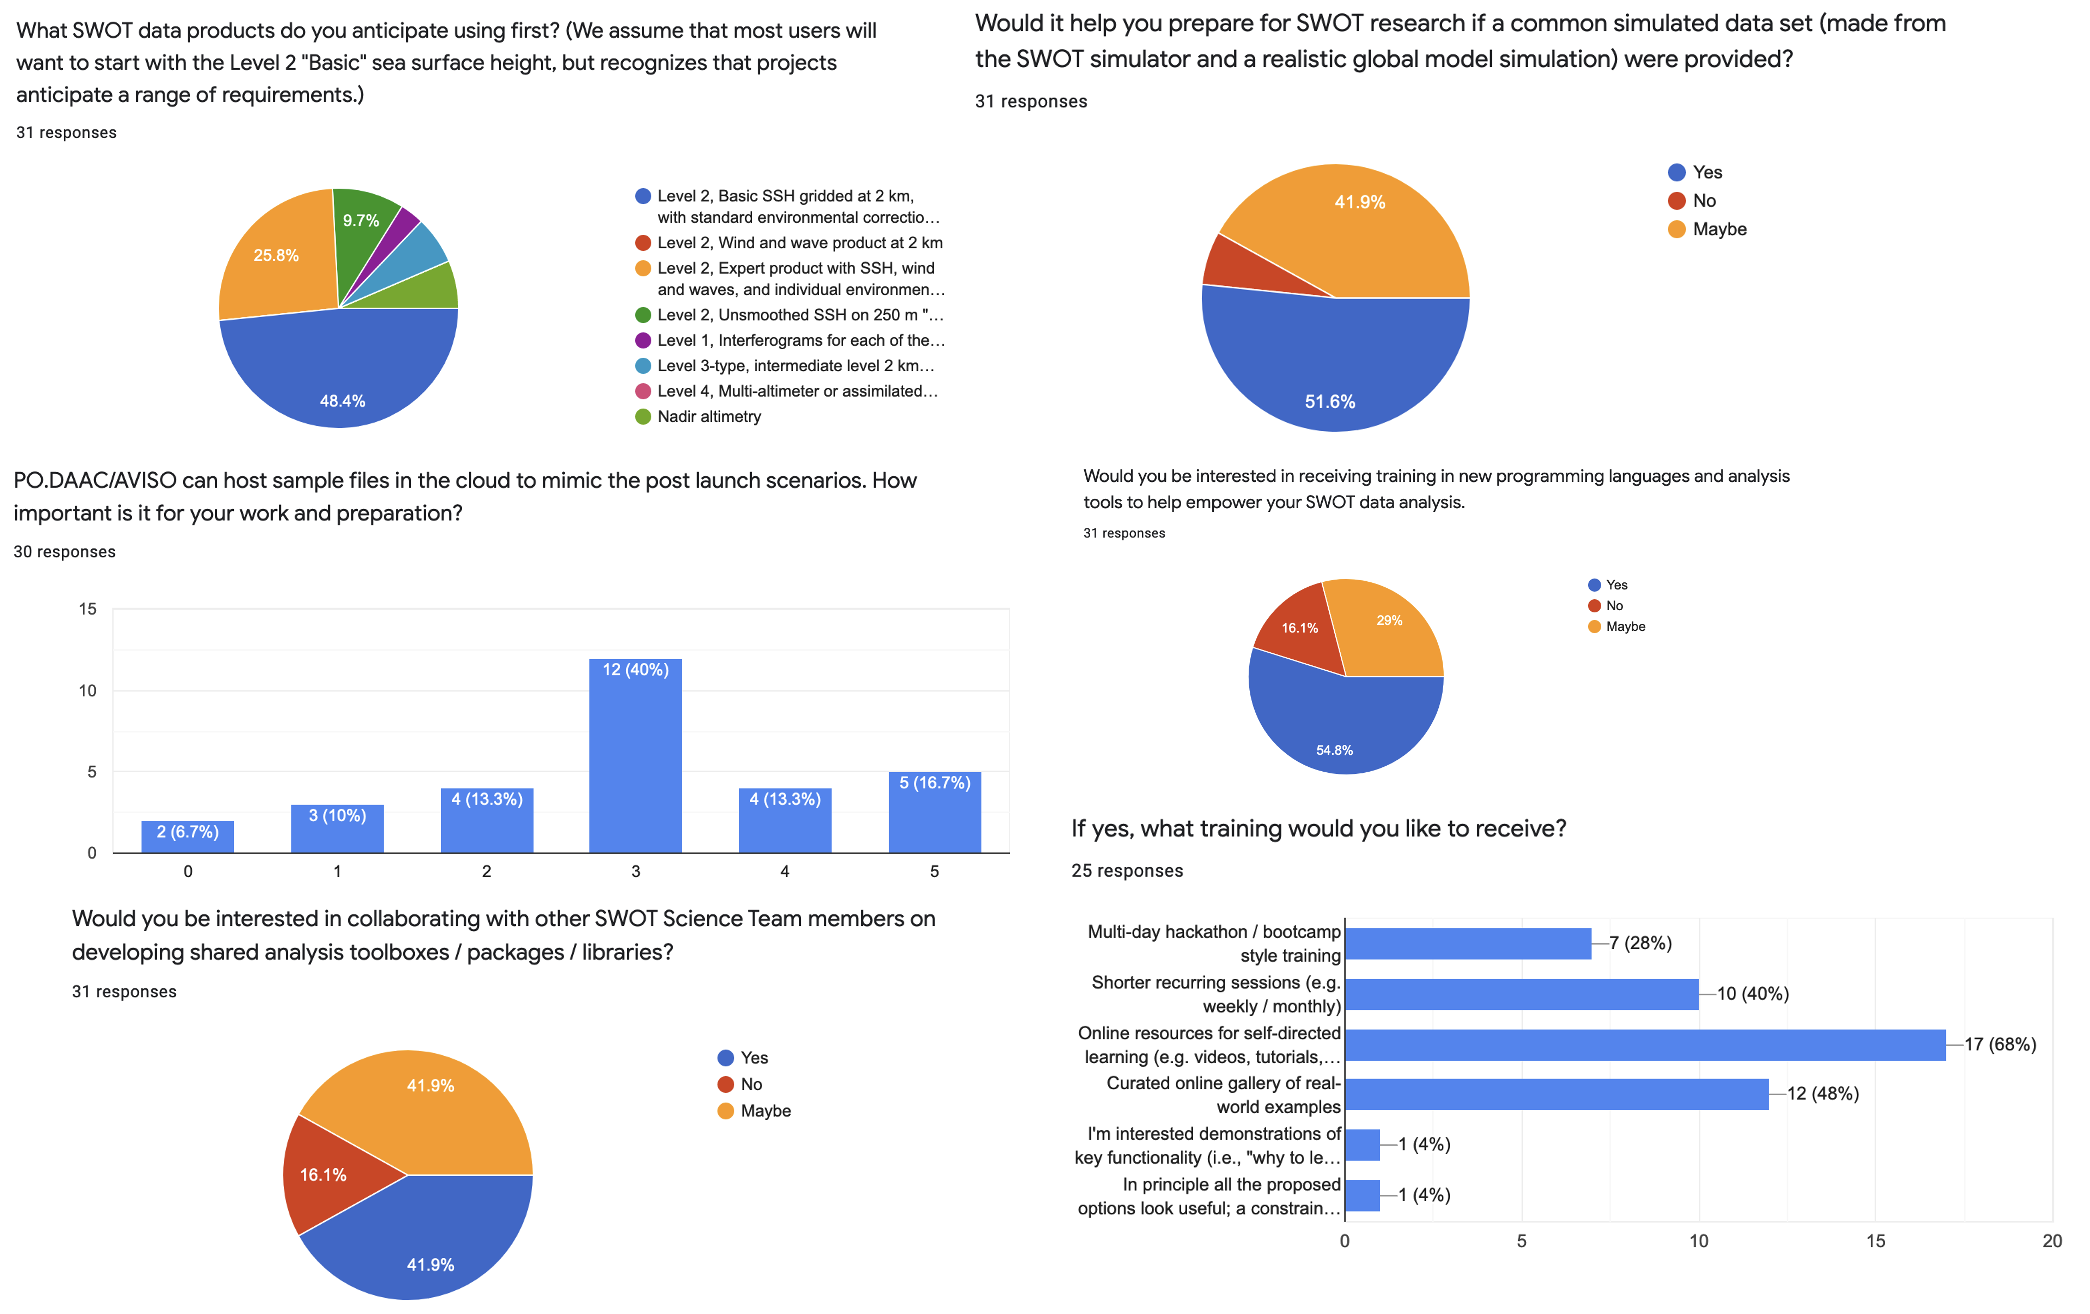

## Simulated L2 SSH

[Level 2 KaRIn Low Rate Sea Surface Height Product PDF file (D-56407)](https://podaac-tools.jpl.nasa.gov/drive/files/misc/web/misc/swot_mission_docs/pdd/D-56407_SWOT_Product_Description_L2_LR_SSH_20200806.pdf)

Eight LR_L2 SSH simulated datasets:
```
SWOT_SIMULATED_L2_KARIN_SSH_GLORYS_CALVAL_V1          17686 files
SWOT_SIMULATED_L2_KARIN_SSH_GLORYS_SCIENCE_V1         17564 files
SWOT_SIMULATED_L2_NADIR_SSH_GLORYS_CALVAL_V1          17686 files
SWOT_SIMULATED_L2_NADIR_SSH_GLORYS_SCIENCE_V1         17564 files
SWOT_SIMULATED_L2_KARIN_SSH_ECCO_LLC4320_CALVAL_V1    10288 files
SWOT_SIMULATED_L2_KARIN_SSH_ECCO_LLC4320_SCIENCE_V1   10218 files
SWOT_SIMULATED_L2_NADIR_SSH_ECCO_LLC4320_CALVAL_V1    10287 files
SWOT_SIMULATED_L2_NADIR_SSH_ECCO_LLC4320_SCIENCE_V1   10218 files
```
[List of the simulated L2 SSH datasets on PO.DAAC website.](https://podaac.jpl.nasa.gov/datasetlist?search=simulated%20level-2)

## Relevant content in the simulated L2 SSH files
Hackathon participants are strongly encouraged to read the the [product description](https://podaac-tools.jpl.nasa.gov/drive/files/misc/web/misc/swot_mission_docs/pdd/D-56407_SWOT_Product_Description_L2_LR_SSH_20200806.pdf) to understand the meaning of different variables. Among >90 varialbes in the synethic data files, those with "simulated" prefix are most relevant: 
1. 'simulated_true_ssh_karin'
1. 'simulated_error_baseline_dilation'
1. 'simulated_error_roll'
1. 'simulated_error_phase'
1. 'simulated_error_timing'
1. 'simulated_error_karin'
1. 'simulated_error_orbital'
1. 'simulated_error_troposphere'

They are visualized at the end of this notebook. 


## Other SWOT relevant datasets
1. [All LLC4320-derived datasets in PODAAC](https://podaac.jpl.nasa.gov/datasetlist?search=llc4320#)
1. [Sentinel-6MF alongtracks](https://podaac.jpl.nasa.gov/datasetlist?ids=Processing%20Levels:Instruments&values=2%20-%20Geophys.%20Variables,%20Sensor%20Coordinates::Poseidon-4%20Radar%20Altimeter&search=sentinel-6&view=list)


## Achnowledgment 
* Project ADT, Data providers, science teams
   * F. Briol, Gerald Dibarbource, Nicolas Picot, Emmanuel Cosme, Shailen Desai
   * J. Tom Farrar, Julien le Sommer, Ryan Abernathey, Sarah Gille, Rosemary Morrow, Lee-Lueng Fu
* Openscapes
* PO.DAAC team

In [1]:
from matplotlib import pylab as plt
import xarray as xr
import numpy as np
from pprint import pprint

def init_S3FileSystem(daac='podaac'):
    '''
    This function will return a S3filesystem using s3fs.
    
    Parameter
    =========
    daac: string
          The name of the NASA DAAC where the data are hosted. The options are ['podaac','lpdaac'] and others to be added
    
    Return
    ======
    s3: a s3fs handle
    '''
    
    import requests,s3fs
    s3_cred_endpoint = {
        'podaac':'https://archive.podaac.earthdata.nasa.gov/s3credentials',
        'lpdaac':'https://data.lpdaac.earthdatacloud.nasa.gov/s3credentials'}

    temp_creds_url = s3_cred_endpoint[daac]
    creds = requests.get(temp_creds_url).json()
    s3 = s3fs.S3FileSystem(anon=False,
                           key=creds['accessKeyId'],
                           secret=creds['secretAccessKey'], 
                           token=creds['sessionToken'])
    return s3

s3sys=init_S3FileSystem()

def open_swot_L2SSH(filename):
    '''
    Open a file in S3 using xarray. 
    
    Parameter
    ========
    filename: S3 link to the data file. 
    
    Return
    ======
    xarray Dataset
    '''
    
    return xr.open_dataset(s3sys.open(filename))
    

In [2]:
s3path="s3://podaac-ops-cumulus-protected/SWOT*"

fns= s3sys.glob(s3path)
for aa in fns:
    print('%55s'%aa.split('/')[-1], len(s3sys.glob(aa+'/*nc')), 'files')

fns=s3sys.glob("s3://podaac-ops-cumulus-protected/SWOT_SIMULATED_L2_KARIN_SSH_ECCO_LLC4320_CALVAL_V1/*nc")
pprint(fns[:10])


     SWOT_SIMULATED_L2_KARIN_SSH_ECCO_LLC4320_CALVAL_V1 10288 files
    SWOT_SIMULATED_L2_KARIN_SSH_ECCO_LLC4320_SCIENCE_V1 10218 files
           SWOT_SIMULATED_L2_KARIN_SSH_GLORYS_CALVAL_V1 17686 files
          SWOT_SIMULATED_L2_KARIN_SSH_GLORYS_SCIENCE_V1 17564 files
     SWOT_SIMULATED_L2_NADIR_SSH_ECCO_LLC4320_CALVAL_V1 10287 files
    SWOT_SIMULATED_L2_NADIR_SSH_ECCO_LLC4320_SCIENCE_V1 10218 files
           SWOT_SIMULATED_L2_NADIR_SSH_GLORYS_CALVAL_V1 17686 files
          SWOT_SIMULATED_L2_NADIR_SSH_GLORYS_SCIENCE_V1 17564 files
['podaac-ops-cumulus-protected/SWOT_SIMULATED_L2_KARIN_SSH_ECCO_LLC4320_CALVAL_V1/SWOT_L2_LR_SSH_Expert_001_001_20111113T000000_20111113T005105_DG10_01.nc',
 'podaac-ops-cumulus-protected/SWOT_SIMULATED_L2_KARIN_SSH_ECCO_LLC4320_CALVAL_V1/SWOT_L2_LR_SSH_Expert_001_002_20111113T005105_20111113T014211_DG10_01.nc',
 'podaac-ops-cumulus-protected/SWOT_SIMULATED_L2_KARIN_SSH_ECCO_LLC4320_CALVAL_V1/SWOT_L2_LR_SSH_Expert_001_003_20111113T014211_20111113T02331

In [3]:
data=open_swot_L2SSH(fns[100])
data

<xarray.Dataset>
Dimensions:                                (num_lines: 9868, num_pixels: 71,
                                            num_sides: 2)
Coordinates:
    latitude                               (num_lines, num_pixels) float64 ...
    longitude                              (num_lines, num_pixels) float64 ...
    latitude_nadir                         (num_lines) float64 ...
    longitude_nadir                        (num_lines) float64 ...
Dimensions without coordinates: num_lines, num_pixels, num_sides
Data variables: (12/92)
    time                                   (num_lines) datetime64[ns] ...
    time_tai                               (num_lines) datetime64[ns] ...
    ssh_karin                              (num_lines, num_pixels) float64 ...
    ssh_karin_uncert                       (num_lines, num_pixels) float32 ...
    ssha_karin                             (num_lines, num_pixels) float64 ...
    ssh_karin_2                            (num_lines, num_pixels) float64 ...
    ...                                     ...
    simulated_error_timing                 (num_lines, num_pixels) float64 ...
    simulated_error_roll                   (num_lines, num_pixels) float64 ...
    simulated_error_phase                  (num_lines, num_pixels) float64 ...
    simulated_error_karin                  (num_lines, num_pixels) float64 ...
    simulated_error_orbital                (num_lines, num_pixels) float64 ...
    simulated_error_troposphere            (num_lines, num_pixels) float64 ...
Attributes: (12/32)
    Conventions:                CF-1.7
    title:                      Level 2 Low Rate Sea Surface Height Data Prod...
    institution:                CNES/JPL
    source:                     Simulate product
    history:                    2021-09-23 07:47:11Z : Creation
    platform:                   SWOT
    ...                         ...
    right_last_longitude:       311.89957599684425
    right_last_latitude:        77.03365811434979
    wavelength:                 0.008385803020979
    orbit_solution:             POE
    ellipsoid_semi_major_axis:  6378137.0
    ellipsoid_flattening:       0.0033528106647474805

In [4]:
data['simulated_error_troposphere']

<xarray.DataArray 'simulated_error_troposphere' (num_lines: 9868, num_pixels: 71)>
[700628 values with dtype=float64]
Coordinates:
    latitude         (num_lines, num_pixels) float64 ...
    longitude        (num_lines, num_pixels) float64 ...
    latitude_nadir   (num_lines) float64 -77.66 -77.66 -77.66 ... 77.66 77.66
    longitude_nadir  (num_lines) float64 144.8 144.9 144.9 ... 311.7 311.8 311.9
Dimensions without coordinates: num_lines, num_pixels
Attributes:
    long_name:  Error due to wet troposphere path delay
    units:      m

In [5]:
fns=s3sys.glob("s3://podaac-ops-cumulus-protected/SWOT_SIMULATED_L2_KARIN_SSH_ECCO_LLC4320_SCIENCE_V1/*nc")

['simulated_true_ssh_karin', 'simulated_error_baseline_dilation', 'simulated_error_roll', 'simulated_error_phase', 'simulated_error_timing', 'simulated_error_karin', 'simulated_error_orbital', 'simulated_error_troposphere']


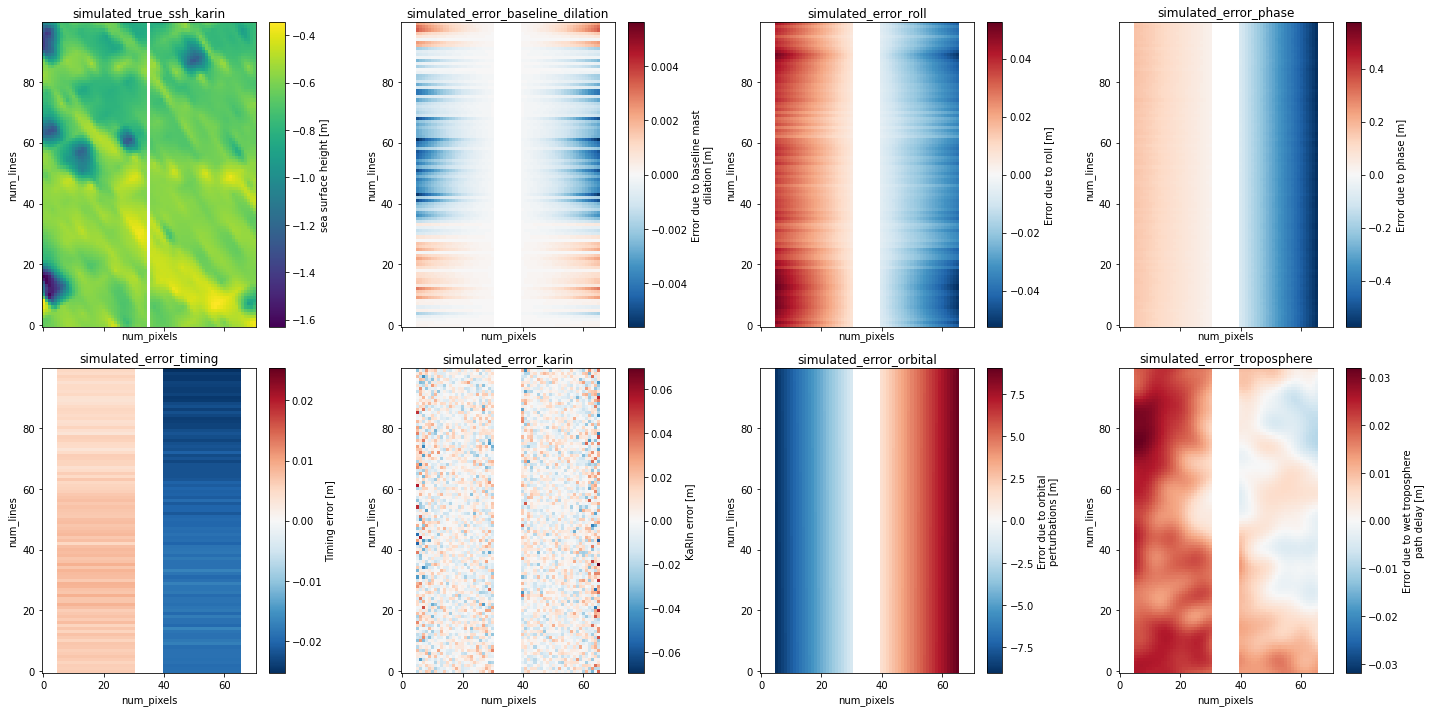

In [6]:
data=open_swot_L2SSH(fns[100])
fig,ax=plt.subplots(2,4,figsize=(20,10),sharex=True)

axx=ax.flatten()

keys=[]
for key in data.keys():
    if 'simulated' in key:
        keys.append(key)
print(keys)
for i, key in enumerate(keys):
    data[key][1000:1100,:].plot(ax=axx[i],)
    axx[i].set_title(key)
plt.tight_layout()

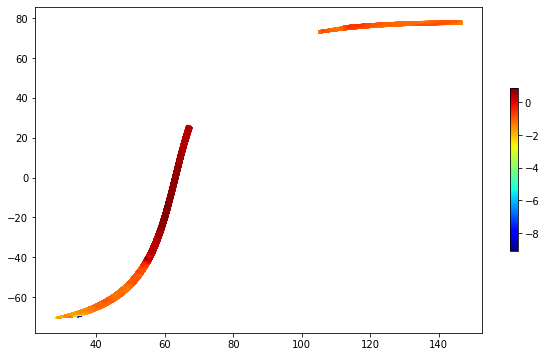

In [7]:
#Plot an example of one pass

import os
os.getcwd()
import pylab as plt
import numpy as np

dd=s3sys.open(fns[1000])
ds=xr.open_dataset(dd)

#print(ds.keys())

#ds=nc.Dataset("SWOT_L2_LR_SSH_Expert_018_290_20121112T003212_20121112T012339_DG10_01.nc")
#print(ds.variables.keys())

sla=ds['simulated_true_ssh_karin'].data.flatten()
lat=ds['latitude'].data.flatten()
lon=ds['longitude'].data.flatten()

#mask=(lat>-40)&(lat<-20)&(lon>90)&(lon<96)
#sla=np.ma.masked_array(sla,mask=~mask)
#sla=np.ma.masked_invalid(sla)
#print(sla.mean())
#sla=sla-sla.mean()

plt.figure(figsize=(10,6))
plt.scatter(lon,lat,c=sla,cmap=plt.cm.jet,s=1)
plt.colorbar(shrink=0.5)
#plt.xlim(90,96)
#plt.ylim(-40,-20)


### Save all passes into a signal file (experimental)

Use the following to collect the lat/lon/time information from all passes and save them into a single (big) file. You can use it as a template to save other variables. 